In [2]:
import numpy as np
import pandas as pd

In [10]:
distrect = np.random.randint(0 , 10 , 30)
distrect

array([0, 1, 3, 4, 7, 5, 2, 1, 7, 7, 7, 2, 9, 5, 7, 8, 5, 4, 6, 6, 7, 3,
       5, 2, 2, 2, 4, 2, 1, 3])

In [3]:
distrect = np.array([7, 6, 3, 7, 6, 8, 2, 8, 0, 0, 3, 9, 5, 3, 7, 7, 1, 8, 1, 9, 3, 6,
       3, 1, 7, 2, 9, 1, 3, 0])
distrect

array([7, 6, 3, 7, 6, 8, 2, 8, 0, 0, 3, 9, 5, 3, 7, 7, 1, 8, 1, 9, 3, 6,
       3, 1, 7, 2, 9, 1, 3, 0])

In [4]:
distrect_Series = pd.Series(distrect)
distrect_Series

0     7
1     6
2     3
3     7
4     6
5     8
6     2
7     8
8     0
9     0
10    3
11    9
12    5
13    3
14    7
15    7
16    1
17    8
18    1
19    9
20    3
21    6
22    3
23    1
24    7
25    2
26    9
27    1
28    3
29    0
dtype: int32

In [6]:
distrect_Series.values

array([0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 5, 6, 6, 6, 7, 7, 7,
       7, 7, 8, 8, 8, 9, 9, 9])

In [16]:
distrect_Series.value_counts()

3    6
7    5
1    4
0    3
6    3
8    3
9    3
2    2
5    1
dtype: int64

In [8]:
distrect_Series.value_counts().sort_index()

0    3
1    4
2    2
3    6
5    1
6    3
7    5
8    3
9    3
dtype: int64

<AxesSubplot:>

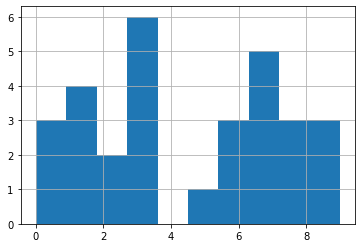

In [5]:
distrect_Series.hist()
# gistogram

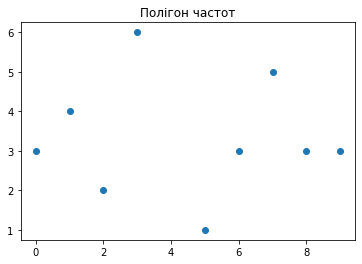

In [61]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

#  Данные, которые хотим отобразить:
x, y= distrect_Series.value_counts().index ,distrect_Series.value_counts().values

ax.scatter( x ,y  )    #  метод, отображающий данные в виде точек
                      #  на плоскости

ax.set(title='Полігон частот')    #  метод, размещающий заголовок
                                       #  над "Axes"
    
plt.show()

In [7]:
distrect_Series.value_counts().index

Int64Index([3, 7, 1, 0, 6, 8, 9, 2, 5], dtype='int64')

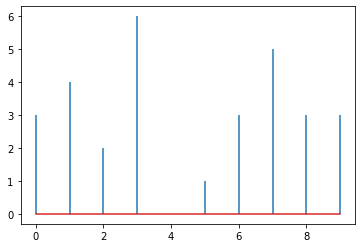

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x, y = distrect_Series.value_counts().index , distrect_Series.value_counts()

fig, ax = plt.subplots()
ax.stem(x, y, markerfmt=' ')
plt.show()
# діаграса

In [64]:
data_empiric = distrect_Series.value_counts().sort_index()


data_empiric.expanding().sum()



0     3.0
1     7.0
2     9.0
3    15.0
5    16.0
6    19.0
7    24.0
8    27.0
9    30.0
dtype: float64

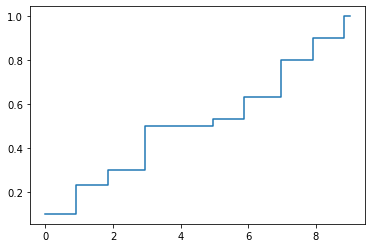

In [22]:
# побудувати емпіричну функцію розподілу та намалювати її графік;



import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt

sample =  distrect_Series
ecdf = sm.distributions.ECDF(sample)

x = np.linspace(min(sample), max(sample))
y = ecdf(x)
plt.step(x, y)
plt.show()

In [10]:
x, y = distrect_Series.value_counts().index , distrect_Series.value_counts().values
x,y

(Int64Index([3, 7, 1, 0, 6, 8, 9, 2, 5], dtype='int64'),
 array([6, 5, 4, 3, 3, 3, 3, 2, 1], dtype=int64))

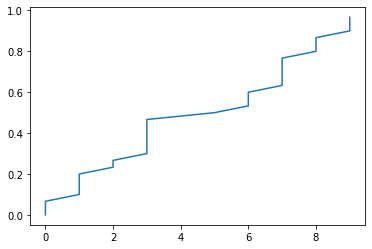

In [11]:
plt.plot(np.sort(distrect_Series), np.linspace(0, 1, len(distrect_Series), endpoint=False))


In [12]:
# Обчислити числові характеристики статистичного матеріалу:

# · медіану, моду, середнє арифметичне;

# · розмах, варіансу, стандарт, вибіркову дисперсію, варіацію;

# · асиметрію та ексцеc

# Виправлена вибіркова дисперсія (варіанса) – це сума квадратів відхилень елементів від вибіркового середнього, поділена на – .
# Стандарт – це арифметичний квадратний корінь із варіанси.
# Вибіркова дисперсія – це середнє значення квадратів відхилення варіант від вибіркового середнього з урахуванням відповідних частостей.
# варіацію - дисперсія

In [22]:
import math
from scipy.stats import moment
print("медіана: " , distrect_Series.median())
print("мода: " , distrect_Series.mode().values)
avg = round(distrect_Series.mean() , 3)
print("середнє арифметичне: " , avg)
print("розмах: " , distrect_Series.max() - distrect_Series.min())
variance = round((((distrect_Series - avg) ** 2).sum()) / (distrect_Series.count() - 1), 3)
print("варіанса" ,variance )

print("cтандарт" , round(math.sqrt(variance) , 3) )
print("вибіркова дисперсія" , 9.36 ) # зайти на https://allcalc.ru/node/1835 
print("варіація: " , math.sqrt(variance) / avg)
print("асиметрія: " , round(moment(distrect_Series, moment=3) / (moment(distrect_Series, moment=2) ** 1.5) , 3) ) 
print("ексцес: " , round((moment(distrect_Series, moment=4) / (moment(distrect_Series, moment=2) ** 2) -3) , 3) ) 



медіана:  4.0
мода:  [3]
середнє арифметичне:  4.5
розмах:  9
варіанса 9.362
cтандарт 3.06
вибіркова дисперсія 9.36
варіація:  0.679941900204952
асиметрія:  -0.007
ексцес:  -1.441


In [20]:
variance =( (distrect_Series - avg) ** 2)
variance = round((((distrect_Series - avg) ** 2).sum()) / (distrect_Series.count() - 1), 3)
print("варіанса" ,variance )

варіанса 9.362


In [17]:
distrect_Series.mode()

0    3
dtype: int32

In [3]:
continuous = [3, 2, 3, 2, 8, 6, 0, 5, 1, 7, 7, 0, 2, 7, 0, 5, 4, 5, 2, 3, 6, 0,
       4, 1, 4, 5, 5, 2, 2, 1]
continuous

[3,
 2,
 3,
 2,
 8,
 6,
 0,
 5,
 1,
 7,
 7,
 0,
 2,
 7,
 0,
 5,
 4,
 5,
 2,
 3,
 6,
 0,
 4,
 1,
 4,
 5,
 5,
 2,
 2,
 1]

In [67]:
continuous_Series_value_counts = pd.Series(continuous , name="vals")
continuous_Series_value_counts

0     3
1     2
2     3
3     2
4     8
5     6
6     0
7     5
8     1
9     7
10    7
11    0
12    2
13    7
14    0
15    5
16    4
17    5
18    2
19    3
20    6
21    0
22    4
23    1
24    4
25    5
26    5
27    2
28    2
29    1
Name: vals, dtype: int64

In [37]:
continuous_df = continuous_Series.to_frame()
continuous_df = continuous_df.sort_index()
continuous_df.head()

,vals
0,3
1,2
2,3
3,2
4,8


In [38]:
continuous_df["group"] = continuous_df.vals // 3
continuous_df["row_num"] = continuous_df.index
continuous_df



,vals,group,row_num
0,3,1,0
1,2,0,1
2,3,1,2
3,2,0,3
4,8,2,4
5,6,2,5
6,0,0,6
7,5,1,7
8,1,0,8
9,7,2,9


In [80]:
continuous_df.groupby("group")["vals"].count().expanding().sum() / 30

group
0    0.433333
1    0.800000
2    1.000000
Name: vals, dtype: float64

In [78]:
group_by_count_absolute = continuous_df.groupby("group")["vals"].count().expanding().sum()
group_by_count_absolute

group
0    13.0
1    24.0
2    30.0
Name: vals, dtype: float64

In [70]:
group_by_count = continuous_df.groupby("group")["vals"].count() / 30
group_by_count

group
0    0.433333
1    0.366667
2    0.200000
Name: vals, dtype: float64

(array([13., 11.,  6.]),
 array([0.        , 2.66666667, 5.33333333, 8.        ]),
 <BarContainer object of 3 artists>)

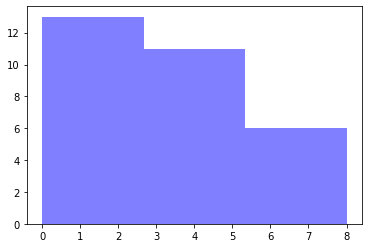

In [68]:
plt.hist(continuous_Series_value_counts, 3, facecolor='blue', alpha=0.5)

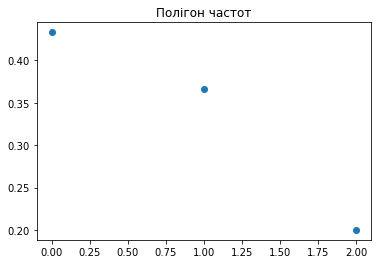

In [72]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

#  Данные, которые хотим отобразить:
x, y= group_by_count.index ,group_by_count.values

ax.scatter( x ,y  )    #  метод, отображающий данные в виде точек
                      #  на плоскости

ax.set(title='Полігон частот')    #  метод, размещающий заголовок
                                       #  над "Axes"
    
plt.show()

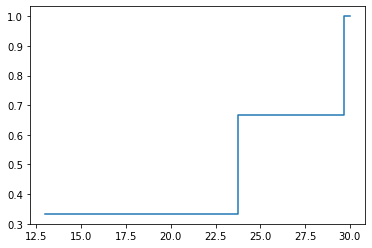

In [81]:
import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt

sample =  group_by_count_absolute
ecdf = sm.distributions.ECDF(sample)

x = np.linspace(min(sample), max(sample))
y = ecdf(x)
plt.step(x, y)
plt.show()

In [48]:
continuous_df.groupby("group").max()

,vals,row_num
group,,
0,2,29
1,5,26
2,8,20


In [11]:
continuous_df.index

RangeIndex(start=0, stop=30, step=1)

In [60]:
freq = continuous_Series.value_counts().sort_index()
freq

0    4
1    3
2    6
3    3
4    3
5    5
6    2
7    3
8    1
dtype: int64

In [80]:
continuous_Series.values

array([0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5,
       5, 5, 6, 6, 7, 7, 7, 8])

In [82]:
values =   pd.Series(continuous)

In [84]:
import math
from scipy.stats import moment
print("медіана: " , values.median())
print("мода: " , values.mode().values)
avg = round(values.mean() , 3)
print("середнє арифметичне: " , avg)
print("розмах: " , values.max() - values.min())
variance = round((((values - avg) ** 2).sum()) / (values.count() - 1), 3)
print("варіанса" ,variance )
print("cтандарт" , round(math.sqrt(variance) , 3) )
print("вибіркова дисперсія" , 9.36 ) # зайти на https://allcalc.ru/node/1835 
print("варіація: " , math.sqrt(variance) / avg)
print("асиметрія: " , round(moment(values, moment=3) / (moment(values, moment=2) ** 1.5) , 3) ) 
print("ексцес: " , round((moment(values, moment=4) / (moment(values, moment=2) ** 2) -3) , 3) ) 


медіана:  3.0
мода:  [2]
середнє арифметичне:  3.4
розмах:  8
варіанса 5.628
cтандарт 2.372
вибіркова дисперсія 9.36
варіація:  0.6977472401039393
асиметрія:  0.206
ексцес:  -1.048
